In [1]:
import pandas, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

In [2]:
reader = lambda url, **multiargs : pandas.read_table(url, sep=",", **multiargs)

url = "/content/online_retail.csv"

tanggal = ["date"]

origin = reader(url, parse_dates=tanggal)

origin.iloc[:5]

,invoice,stock,description,quantity,date,price,customer,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
origin.tail()

,invoice,stock,description,quantity,date,price,customer,country
805615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
805616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
805617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
805618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
805619,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [4]:
null = origin.isnull().sum()

null.sum()

0

In [5]:
origin["price"].min()

0.0

In [6]:
origin["quantity"].min()

1

In [7]:
origin["price"].sum()

2583042.398

In [8]:
origin["invoice"].nunique()

36975

In [9]:
origin["total"] = origin["price"] * origin["quantity"]

origin["total"].sum()

17743429.178000007

### ```Highest Price Product```

In [10]:
origin[origin["price"] == origin["price"].max()]

,invoice,stock,description,quantity,date,price,customer,country,total
98328,502263,M,Manual,1,2010-03-23 15:22:00,10953.5,12918.0,United Kingdom,10953.5


### ```Lowest Price Product```

In [11]:
origin[origin["price"] == origin["price"].min()].iloc[:5]

,invoice,stock,description,quantity,date,price,customer,country,total
3631,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom,0.0
4754,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom,0.0
12751,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom,0.0
14138,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0.0
14139,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0.0


In [12]:
origin = origin[origin["price"] != 0]

origin[origin["price"] == origin["price"].min()].iloc[:5]

,invoice,stock,description,quantity,date,price,customer,country,total
41655,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom,0.001
50927,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom,0.001
53381,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom,0.001
54812,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom,0.001
63520,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom,0.001


In [13]:
customer = origin.groupby("customer")[["total"]].sum()

customer = customer.sort_values(by="total", ascending=False)

customer.iloc[:5]

,total
customer,
18102.0,608821.65
14646.0,528602.52
14156.0,313946.37
14911.0,295972.63
17450.0,246973.09


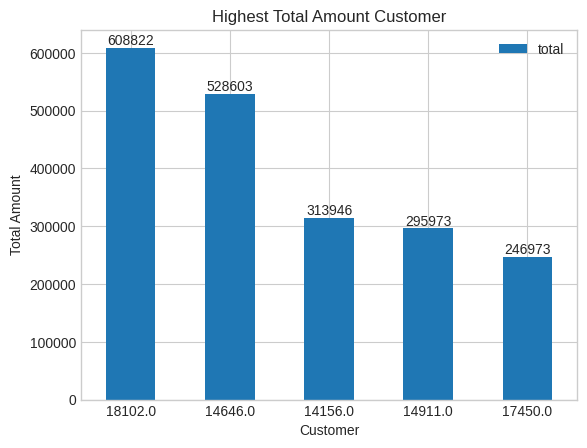

In [14]:
plot = customer.iloc[:5].plot.bar(title="Highest Total Amount Customer", rot=0)

plot.set_xlabel("Customer")

plot.set_ylabel("Total Amount")

plot.bar_label(plot.containers[0]);

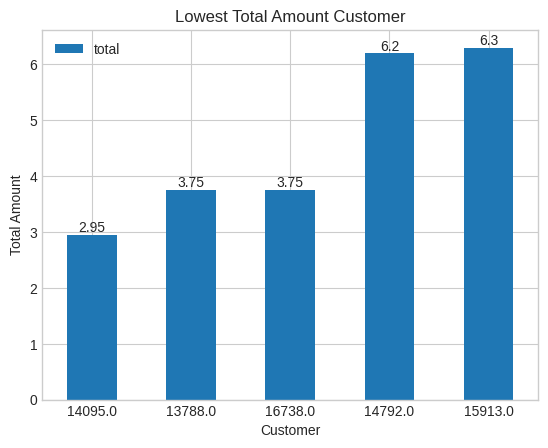

In [15]:
customer = customer.sort_values(by="total")

plot = customer.iloc[:5].plot.bar(title="Lowest Total Amount Customer", rot=0)

plot.set_xlabel("Customer")

plot.set_ylabel("Total Amount")

plot.bar_label(plot.containers[0]);

In [16]:
product = origin.groupby("description")[["quantity"]].sum()

product = product.sort_values(by="quantity", ascending=False)

product[:5]

,quantity
description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
WHITE HANGING HEART T-LIGHT HOLDER,93640
"PAPER CRAFT , LITTLE BIRDIE",80995
ASSORTED COLOUR BIRD ORNAMENT,79913
MEDIUM CERAMIC TOP STORAGE JAR,77916
